# Régression Linéaire

<img src="./figures/lr.jpg" width="700px"/>

<div class="alert alert-block alert-info">
    

Soit un **train set** composé de $N$ observations:

$$
S_{\rm train} = \left\{ \left( \boldsymbol{x_1}, y_1 \right), \dots, \left( \boldsymbol{x_N}, y_N \right) \right\}.
$$

La matrice des **features** $\boldsymbol{X}$ et le vecteur (ou matrice) des **targets** $\boldsymbol{y}$ sont définis de la manière suivante:

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & \boldsymbol{x_1}^T \\
\vdots & \vdots \\
1 & \boldsymbol{x_N}^T 
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1p} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} &\cdots & x_{Np}
\end{pmatrix}~
\text{  et  }~
\boldsymbol{y} =
\begin{pmatrix}
y_1 \\
\vdots \\
y_N 
\end{pmatrix}
$$


La solution de la **régression linéaire (LR)** est le vecteur de coefficients

$$\boldsymbol{\hat \beta} = (\hat \beta_0, \dots, \hat \beta_p)$$
    
obtenu via minimisation de la **somme résiduelle des carrés** ou **residual sum of squares (RSS)**, qui représente la distance entre les prédictions $\hat y_i$ et les réponses $y_i$:

$$
\mathrm{RSS(\boldsymbol{\beta})} 
:= \sum_{i=1}^N \big(\hat y_i - y_i \big)^2 = \sum_{i=1}^N \big(\boldsymbol{x_i}^T \boldsymbol{\beta} - y_i \big)^2 
= \| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \|^2
$$

On a alors (cf. cours):

$$
\boldsymbol{\hat{\beta}} 
= \underset{\boldsymbol{\beta}}{\arg \min} RSS(\boldsymbol{\beta}) = \underset{\boldsymbol{\beta}}{\arg \min} \left\| \boldsymbol{X} \boldsymbol{\beta} - \boldsymbol{y} \right\|^2 
= (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

Une fois le vecteur $\boldsymbol{\hat \beta}$ obtenu, les **prédictions** associées à des features $\boldsymbol{X}$ sont données par:
    
$$
\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{\hat \beta}
$$
    
</div>

## Exercice


### Generate data
1. Le code de cette section génère des data bruitées à partir de l'équation d'une droite.<br>
   Ensuite, les data sont séparées en un **train set** et un **test set**.<br>
   Comprenez ce code...
   
   
### Model
2. Dans la classe `LinearRegression()`, complétez la méthode `fit(...)` qui, étant donné un **train set** `X_train, y_train` (**features** et **targets**), calcule la solution `beta_hat` de la régression linéaire selon l'équation présentée ci-dessus. Cette solution sera stockée dans l'attribut `self.beta_hat`. <br>


3. Compétez la méthode `predict(...)` qui retourne les **prédictions** `y_hat` associées à un ensemble de features `X`. <br>


### Training and Results
4. En utilisant votre classe `LinearRegression()`, instanciez et entraînez une **régression linéaire** sur le train set `X_train, y_train`.


5. Calculez les prédictions associées au test features `X_test`.


6. Faites les graphe des points du test set et de leur prédictions repsectives.


### Multidimension

7. En vous inspirant du point 1, génèrez des data bruitées de dimension supérieures, par exemple de dimension $7$. Séparez ces data en un train et un test set. En utilisant votre classe `LinearRegression()`, instanciez une **régression linéaire**, entrâinez-la sur votre train set, puis claculez les prédictions sur votre test set. Obtenez-vous de bons résultats?


### Ridge Regression


8. Dans votre classe `LinearRegression()`, ajouter une fonctionalité qui permet d'implémenter la **régression Ridge**. On rappelle que la solution de la régression Ridge est (cf. cours)
$$
\mathbf{\hat \beta} = (\mathbf{X^T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X^T} \mathbf{y}
$$

Évaluez votre régression Ridge sur vos data unidimensionnelles et multidimensionnelles. Obtenez-vous de meilleurs résultats que pour la régression linéaire?

## Libraries

In [76]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme()

## Generate data

In [77]:
# generate data
X, y, coeff = make_regression(n_samples=500, n_features=1, 
                              noise=30, bias=30, coef=True, 
                              random_state=42)

In [78]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 1), (400,), (100, 1), (100,))

In [80]:
X_train

array([[-0.6929096 ],
       [-0.02090159],
       [-0.60063869],
       [ 0.15372511],
       [ 0.17457781],
       [-0.18565898],
       [ 1.45353408],
       [-0.81581028],
       [ 0.53891004],
       [-0.48536355],
       [ 0.36659825],
       [-0.59939265],
       [-0.93987979],
       [ 0.1990597 ],
       [-1.00252936],
       [ 0.21645859],
       [ 0.61167629],
       [ 0.06980208],
       [ 2.06074792],
       [-1.95967012],
       [-1.24573878],
       [-1.05771093],
       [ 0.66967255],
       [ 0.38531738],
       [-1.61271587],
       [-0.10876015],
       [-0.16128571],
       [-1.05921352],
       [-1.32045661],
       [ 0.15039379],
       [-0.29169375],
       [-0.98572605],
       [-0.82899501],
       [-1.10633497],
       [-0.32138584],
       [-0.95554044],
       [-0.11453985],
       [ 0.31125015],
       [ 0.06751848],
       [ 1.44127329],
       [-3.24126734],
       [ 0.2322537 ],
       [ 1.53273891],
       [-1.37766937],
       [ 0.0675282 ],
       [ 0

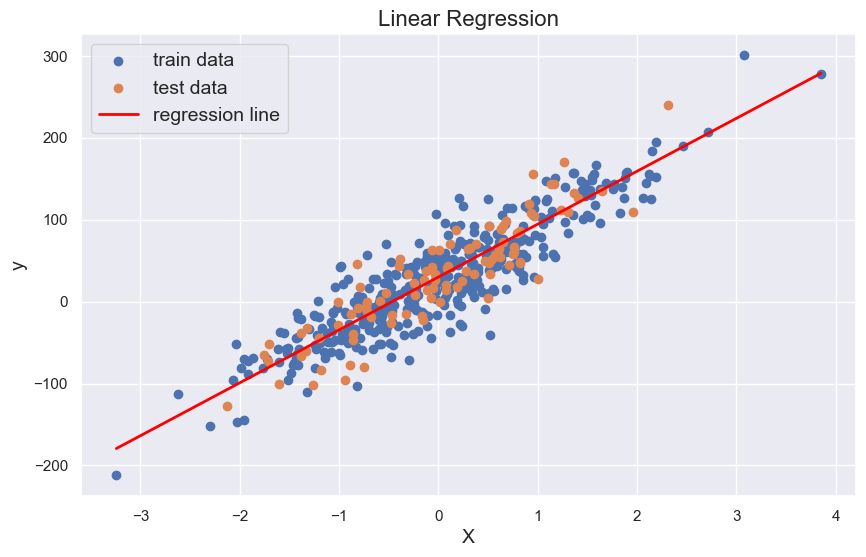

In [81]:
# plot train and test data
plt.figure(figsize=(10, 6))

x_true = np.linspace(X_train.min(), X_train.max(), num=100)
y_true = coeff * x_true + 30 # 30 is the bias

plt.scatter(X_train, y_train, marker = 'o', label="train data")
plt.scatter(X_test, y_test, marker = 'o', label="test data")
plt.plot(x_true, y_true, color="red", linewidth=2, label="regression line")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.title("Linear Regression", fontsize=16)

plt.savefig("lr.jpg", bbox_inches='tight')
plt.show()

## Model

In [82]:
class LinearRegression():
    """
    Implements the linear regression algorithm.
    Closed-form solution (not gradient descent)
    """
    
    def __init__(self, mode = ('Normal', None)):
        """
        Constructor.
        """

        self.beta_hat = None # empty solution
        self.mode = mode
        
    
    def fit(self, X_train, y_train):
        """
        Fits the linear regression on the train set X_train, y_train.
        This method modifies the attribute beta_hat, which stores the solution of the LR. 
        
        Parameters
        ----------
        X_train : ndarray
            Train features of dim N x p, where p is the number of features.
        y_train : ndarray
            Train targets dim N x 1 (or N x q if multi-dimensional targets)
        """
        x_train = np.concatenate([np.ones(shape=(X_train.shape[0], 1)), X_train], axis=1)
        beta_hat = np.matmul(x_train.T, x_train)
        if self.mode[0] == 'ridge' :
            beta_hat = beta_hat + self.mode[1]*np.eye(beta_hat.shape[0])
        beta_hat = np.linalg.inv(beta_hat)
        beta_hat = np.matmul(beta_hat, x_train.T)
        self.beta_hat = np.matmul(beta_hat, y_train)
        
        
    def predict(self, X):
        """
        Computes the predictions associated to features X.
        The predictions are computed as follows:
        - expand the features X with a first column of 1's
        - y_hat = X beta_hat
        
        Parameters
        ----------
        X : ndarray
            Features of dim N' x p, where p is the number of features.
            
        Returns
        -------
        y_hat : ndarray
            Predictions of dim N' x 1 (or N' x q if multi-dimensional targets)
        """
        x = np.concatenate([np.ones(shape=(X.shape[0], 1)), X], axis=1)
        return np.matmul(x, self.beta_hat)

## Training and Results

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [84]:
y_pred

array([  62.13157316,   -4.18029485,   39.83438773,  -25.00707845,
         66.57630235,   76.08987156,  -16.88083472,  -80.71343171,
        -20.16358657,   46.88835318,   34.51698042,  115.52756378,
         72.77313097,   33.05325375,   -0.7839488 ,  -13.57832804,
        -49.81081561,   67.19410678,  113.2979545 ,   26.42467258,
         60.34552343,  -25.89681388,   79.4707655 ,   25.00615673,
         23.98431024,  172.12830277,  -57.37830497,  -22.33406332,
          8.46325693,  -15.88674714,   -0.45443926,    9.7641393 ,
         79.51064068,   20.51405237,   57.82862991,  -77.27733938,
         50.61455293,  -26.40823193,  -18.00556354,  105.28713972,
        -33.99087719,  100.65334689,   60.38604884,  -53.49470994,
        -34.41381586,   77.59373654,  -21.71816567,   34.14980779,
         26.29947312,   67.80235769,   29.08926406,   48.57044586,
        -24.7509316 ,   24.75925777,  -16.14079339,   13.92086205,
         86.25999293,   19.61638163,   68.88688432,   79.48055

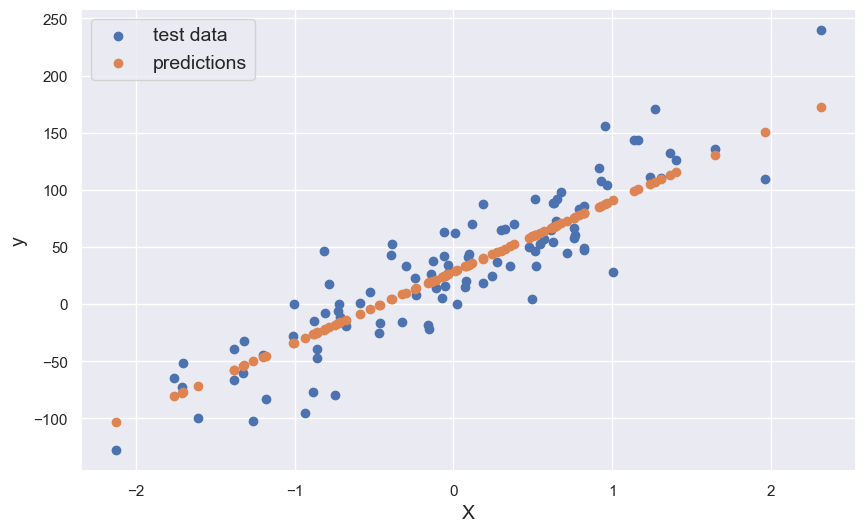

In [85]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, marker = 'o', label="test data")
plt.scatter(X_test, y_pred, marker = 'o', label="predictions")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)

plt.show()

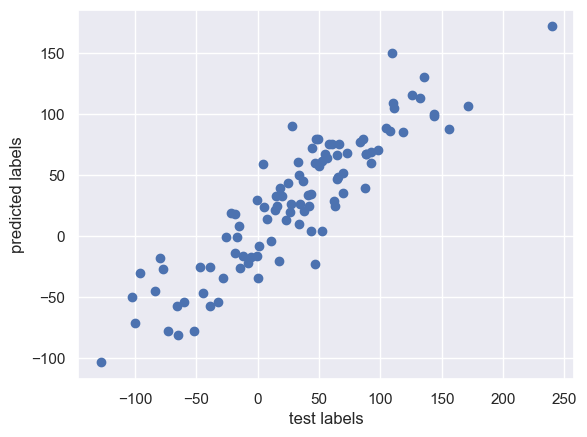

In [86]:
plt.scatter(y_test, y_pred)
plt.xlabel("test labels")
plt.ylabel("predicted labels")
plt.show()

## Multidimension

In [87]:
X, y, coeff = make_regression(n_samples=500, n_features=7,
                              noise=30, bias=30, coef=True,
                              random_state=42)

In [88]:
X.shape, y.shape, coeff

((500, 7),
 (500,),
 array([87.43073341, 24.06705148, 34.99378536, 78.24258122, 83.06227604,
        99.25146202, 22.46573976]))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 7), (400,), (100, 7), (100,))

In [91]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

In [92]:
lr2.beta_hat, coeff

(array([29.97615086, 88.69719923, 26.69318017, 35.00316027, 79.08101228,
        82.08820676, 99.64153651, 19.68676297]),
 array([87.43073341, 24.06705148, 34.99378536, 78.24258122, 83.06227604,
        99.25146202, 22.46573976]))

In [93]:
y_pred = lr2.predict(X_test)

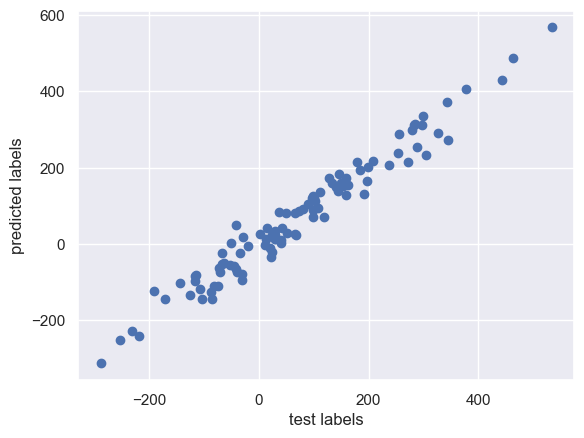

In [94]:
plt.scatter(y_test, y_pred)
plt.xlabel("test labels")
plt.ylabel("predicted labels")
plt.show()

## Ridge Regression

In [95]:
lr3 = LinearRegression(mode=("ridge", 100))
lr3.fit(X_train, y_train)

In [97]:
y_test_pred = lr3.predict(X_test)

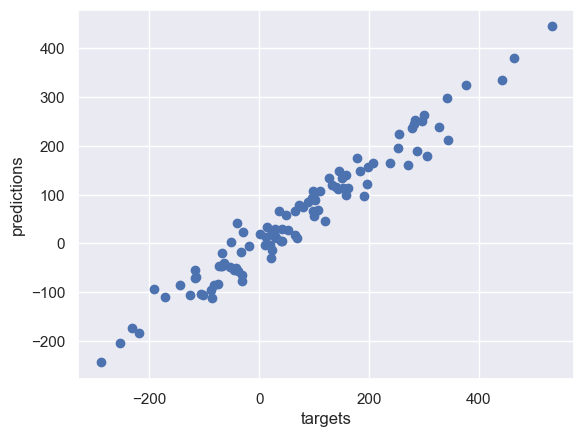

In [98]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("targets")
plt.ylabel("predictions")
plt.show()

In [99]:
def RSS(y_test_pred, y_test):

    return np.sum((y_test_pred - y_test)**2) / len(y_test)

In [133]:
error_d = {}

for lamda in np.logspace(0.85, 1.1, num=20):

    lr = LinearRegression(mode=("ridge", lamda))
    lr.fit(X_train, y_train)
    y_test_pred = lr.predict(X_test)

    error_d[lamda] = RSS(y_test_pred, y_test)

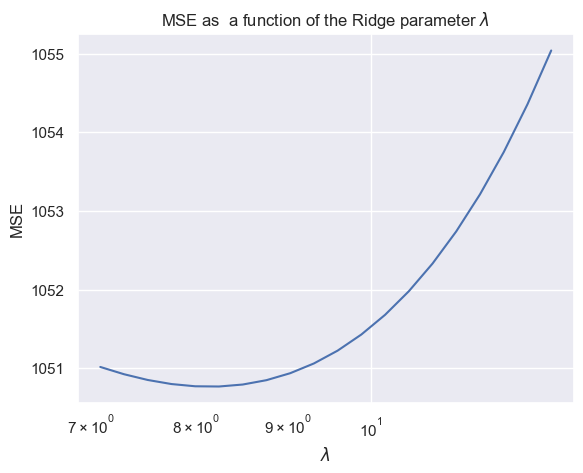

In [134]:
plt.plot(error_d.keys(), error_d.values())
plt.xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("MSE")
plt.title(r"MSE as  a function of the Ridge parameter $\lambda$")
plt.show()

In [141]:
mink = error_d.keys()[0]
for k, v in error_d.items() :
    if error_d[k] < error_d[mink] :
        mink = k

mink

TypeError: 'dict_keys' object is not subscriptable